In [381]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 import numpy as np
 

# **1. Introduction to Decision Tree algorithm**

[Table of Contents](#0.1)

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 


We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-

1. At the beginning, the whole training set is considered as the root.
2. Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
3. Records are distributed recursively on the basis of attribute values.
4. Order to placing attributes as root or internal node of the tree is done by using some statistical approach.




# **2. Classification and Regression Trees (CART)** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**. Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.


The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem. 


# **3. Decision Tree algorithm terminology** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


- In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

- We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-


## **Root Node**

- It represents the entire population or sample. This further gets divided into two or more homogeneous sets.


## **Splitting**

- It is a process of dividing a node into two or more sub-nodes.


## Decision Node

- When a sub-node splits into further sub-nodes, then it is called a decision node.


## Leaf/Terminal Node

- Nodes that do not split are called Leaf or Terminal nodes.


## Pruning

- When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.


## Branch/Sub-Tree

- A sub-section of an entire tree is called a branch or sub-tree.


## Parent and Child Node

- A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent node. 


The above terminology is represented clearly in the following diagram:-

# **4. Decision Tree algorithm intuition** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node. 

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


# **5. Attribute selection measures** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


In [382]:
dataset=sns.load_dataset('titanic')

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


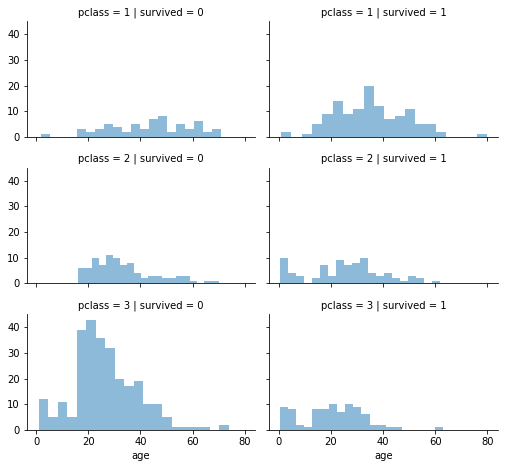

In [446]:
grid = sns.FacetGrid(dataset, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


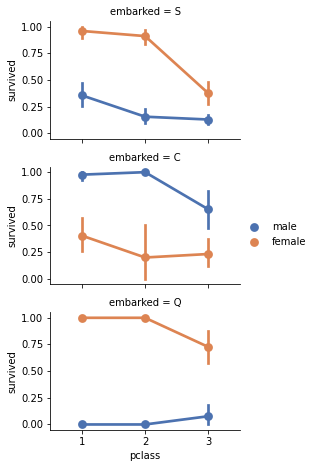

In [448]:
grid = sns.FacetGrid(dataset, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()

In [383]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [384]:
x=dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14]]
# y=dataset.iloc[:,0]

In [385]:
# y.head()

In [386]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [387]:
from sklearn.preprocessing import LabelEncoder


x.iloc[:,[1,2,6,7,8,9,10,11,12,13]]=x.iloc[:,[1,2,6,7,8,9,10,11,12,13]].apply(LabelEncoder().fit_transform)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [388]:
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,2,1,22.0,1,0,18,2,2,1,1,2,0,0
1,1,0,0,38.0,1,0,207,0,0,2,0,0,1,0
2,1,2,0,26.0,0,0,41,2,2,2,0,2,1,1
3,1,0,0,35.0,1,0,189,2,0,2,0,2,1,0
4,0,2,1,35.0,0,0,43,2,2,1,1,2,0,1


## **5.1 Information gain** <a class="anchor" id="5.1"></a>

[Table of Contents](#0.1)


By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**. 

## **Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 

Entropy is represented by the following formula:-




### defining entropy

In [390]:

def entropy(col):
    counts=np.unique(col,return_counts=True) # no of categories in that column
    N=float(col.shape[0]) #total no of rows of that column or total outcome
    entropy=0.0 # initilally zero
    entropy_list=[]
    for i in counts[1]:# i is the favourable outcome for paticular class 
        prob_ith_class=i/N 
        entropy +=(-1.0*prob_ith_class*np.log2(prob_ith_class))
        # entropy_list.append(entropy)
    return entropy


![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, **c** is the number of classes and **pi** is the probability associated with the ith class. 

## **5.2 Gini index-an alternative to enropy** <a class="anchor" id="5.2"></a>

[Table of Contents](#0.1)
Note:-it is used in the case when we have multiple features.

Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 


Gini index can be represented with the following diagram:-

## **Gini index**

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)


Here, again **c** is the number of classes and **pi** is the probability associated with the ith class.

In [391]:
col=np.array([1,1,1,1,0,0,0])
# a=entropy(col)
# classes=np.unique(col,return_counts=True)
# classes
# a

In [392]:
entropy(col)

0.9852281360342515

In [393]:
def divide_data(x_data,feature,threshold_value):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame(data=[],columns=x_data.columns)
    for i in range(x_data.shape[0]):
        # iterating through each value of x_data particular feature one by one
        # feature can be income,age etc.
        val=x_data[feature].loc[i] # value at location i(ith row value)
        if val>threshold_value:
            # note-due to the split row(all features) whole row go either in right or left
            x_right=x_right.append(x_data.loc[i])
        else:
            x_left=x_left.append(x_data.loc[i])
    return x_left,x_right    
# a,b=divide_data(x_data=x,feature='age',threshold_value=x['age'].mean())


### defining information gain

In [394]:
# we will do a binary spilt based on the threshold_value for features and 
# the threshold_value calclated via mean
def information_gain(x_data,feature,threshold_value):
    # splitting data into two parts
    left_node,right_node=divide_data(x_data,feature,threshold_value)
    # calculation the  percentage of total sample in each part
    left_count=float(left_node.shape[0])/x_data.shape[0]
    right_count=float(right_node.shape[0])/x_data.shape[0]

    # case-when either  left_count or right_count becomes zero-we cannot split further
    if left_node.shape[0]==0 or right_node.shape[0]==0:
        # we will return a large negative number(minimum information gain) 
        return -124928391
    root_node_entropy=entropy(x_data.survived)
    right_node_entropy=entropy(right_node.survived)
    left_node_entropy=entropy(left_node.survived)
    a=float(left_count)*left_node_entropy # left ndoe ratio
    b=float(right_count)*right_node_entropy # right_node_ratio
    info_gain=root_node_entropy-( a+b)
    return info_gain

# a=information_gain(x_data=x,feature='age',threshold_value=x['age'].mean())
# print(a)

In [395]:
x=x.apply(LabelEncoder().fit_transform)

In [396]:
# testing our information gain function-here we can see which function to choose to do the splitting 

# x['age']=int(x['age'])
for i in x.columns:
    a=information_gain(x_data=x,feature=i,threshold_value=x[i].mean())
    print(i,a)
    

survived 0.9607079018756469
pclass 0.07579362743608165
sex 0.2176601066606142
age 0.005612578890270892
sibsp 0.009584541813400071
parch 0.015380754493137694
fare 0.05706249928511187
embarked 0.015909401384176403
class 0.07579362743608165
who 0.18693017588531968
adult_male 0.23166399149283212
embark_town 0.015909401384176403
alive 0.9607079018756469
alone 0.029708896074360003


In [397]:
x.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,2,1,28,1,0,18,2,2,1,1,2,0,0
1,1,0,0,51,1,0,207,0,0,2,0,0,1,0
2,1,2,0,34,0,0,41,2,2,2,0,2,1,1
3,1,0,0,47,1,0,189,2,0,2,0,2,1,0
4,0,2,1,47,0,0,43,2,2,1,1,2,0,1


In [398]:
x.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [399]:
class DecisionTree:
    # constructor
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.feature=None
        self.threshold_value=None
        self.max_depth=max_depth
        self.depth=depth
        # target will store the majority prediction for that particular feature row 
        self.target=None
    def train(self,x_train):
        features=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
        info_gain=[]
        for i in features:
            i_gain=information_gain(x_data=x_train,feature=i,threshold_value=x_train[i].mean())
            info_gain.append(i_gain)
        # we want to choose that feature as root node that has maximum information gain
        self.feature=features[np.argmax(info_gain)]
        self.threshold_value=x_train[self.feature].mean()
        print("Making tree feature is",self.feature)


        # split data
        data_left,data_right=divide_data(x_train,self.feature,self.threshold_value)
        # reseting the indexes as 1,2,3,4
        data_left=data_left.reset_index(drop=True)
        data_right=data_right.reset_index(drop=True)
        
        # data left and data_right becomes zero then
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            # we got a pure leaf node
            if x_train.survived.mean() >=0.5:
                self.target='survive'
            else:
                self.target='Dead'
            return
        # stop early when depth>=max_depth
        if (self.depth>=self.max_depth):
            # we got a pure leaf node
            if x_train.survived.mean() >=0.5:
                self.target='survive'
            else:
                self.target='Dead'
            return
        # recursive case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)

        # we can set the target at every node
        # instead of keeping the targe value at leaf node we are keeping it at every node

        if x_train.survived.mean() >=0.5:
            self.target='survive'
        else:
            self.target='Dead'
        return
    def predict(self,test):
        if test[self.feature]>self.threshold_value:
            # go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [400]:
# train-validation-test-set spilt
split=int(0.7*x.shape[0])
train_data=x[:split]
test_data=x[split:]
y_actaual=test_data.iloc[:,[0]]
test_data=test_data.iloc[:,1:]

test_data=test_data.reset_index(drop=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

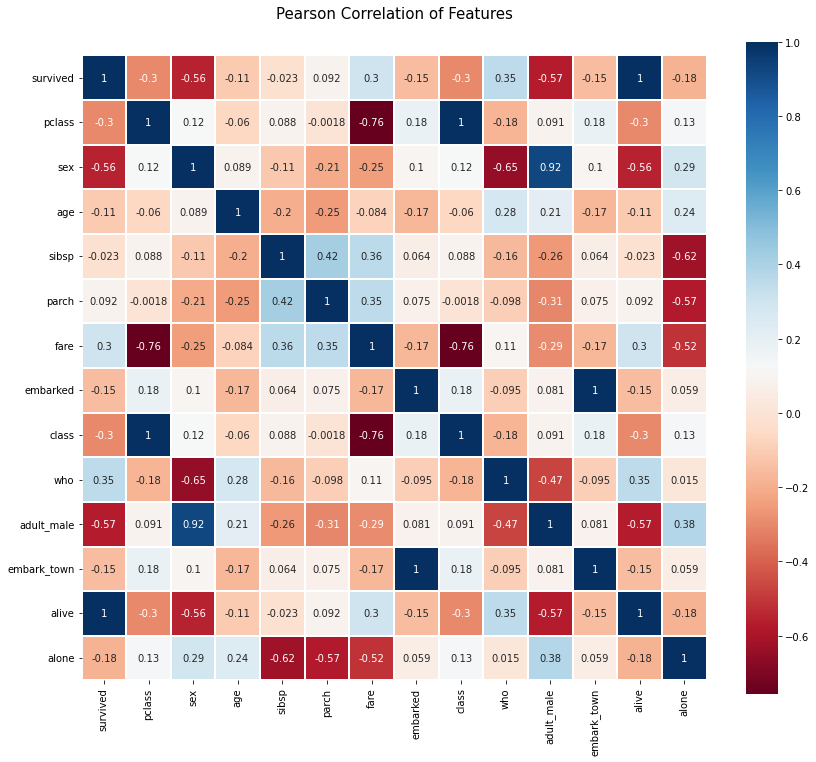

In [441]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [401]:
train_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,2,1,28,1,0,18,2,2,1,1,2,0,0
1,1,0,0,51,1,0,207,0,0,2,0,0,1,0
2,1,2,0,34,0,0,41,2,2,2,0,2,1,1
3,1,0,0,47,1,0,189,2,0,2,0,2,1,0
4,0,2,1,47,0,0,43,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1,1,0,8,2,1,172,2,1,0,0,2,1,0
619,0,1,1,34,0,0,72,2,1,1,1,2,0,1
620,0,2,1,35,1,0,94,0,2,1,1,0,0,0
621,1,0,1,56,1,0,188,2,0,1,1,2,1,0


In [402]:
tree=DecisionTree()

In [403]:
# d ia an object of class decision tree

tree.train(train_data)

Making tree feature is sex
Making tree feature is pclass
Making tree feature is fare
Making tree feature is pclass
Making tree feature is fare
Making tree feature is age
Making tree feature is age
Making tree feature is age
Making tree feature is age
Making tree feature is fare
Making tree feature is parch
Making tree feature is age
Making tree feature is age
Making tree feature is age
Making tree feature is sibsp
Making tree feature is age
Making tree feature is fare
Making tree feature is fare
Making tree feature is fare
Making tree feature is sibsp
Making tree feature is parch
Making tree feature is age
Making tree feature is fare
Making tree feature is age
Making tree feature is fare
Making tree feature is fare
Making tree feature is fare
Making tree feature is fare
Making tree feature is parch
Making tree feature is sibsp
Making tree feature is fare
Making tree feature is sibsp
Making tree feature is fare
Making tree feature is fare
Making tree feature is age
Making tree feature i

In [404]:
# checking the left and right nodes
print(tree.feature)
print(tree.threshold_value)


sex
0.6292134831460674


In [405]:
test_data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,2,1,27,0,0,36,2,2,1,1,2,0,1
1,2,1,27,0,0,109,2,2,1,1,2,0,1
2,0,1,77,0,0,160,2,0,1,1,2,0,1
3,1,1,73,0,0,80,1,1,1,1,1,0,1
4,0,0,27,0,0,213,2,0,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1,1,35,0,0,85,2,1,1,1,2,0,1
264,0,0,24,0,0,153,2,0,2,0,2,1,1
265,2,0,88,1,2,131,2,2,2,0,2,0,0
266,0,1,34,0,0,153,0,0,1,1,0,1,1


In [406]:
y_pred=[]
for i in range(test_data.shape[0]):
    y_pred.append(tree.predict(test_data.loc[i]))
    

In [424]:
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.apply(LabelEncoder().fit_transform)

In [432]:

y_pred=np.array(y_pred).reshape(-1,1)
y_actaual=np.array(y_actaual)

In [433]:
print((np.sum(y_pred==y_actaual)/y_pred.shape[0])*100)


80.22388059701493


#  References** <a class="anchor" id="18"></a>
​
[Table of Contents](#0.1)
​
​
The work done in this project is inspired from following books and websites:-
1. https://www.kaggle.com/code/vandittyagi0909/decision-tree-classifier-tutorial
2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido
